نصب پکیجهای مورد نیاز و آپلود دیتاست

In [0]:
!pip install tpot
from google.colab import files
files.upload()

ایمپورت پیکجهای مورد نیاز

In [0]:

import numpy as np
import pandas as pd 

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


مشخصات دیتاست

**Attributes:**
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

The students are classified into three numerical intervals based on their total grade/mark:
Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

In [0]:
print(df.shape)

(480, 17)


In [0]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
class                       0
dtype: int64

**Data Visualization and Exploration**


نمایش نمودارهای مختلف بر اساس ویژگی‌های گوناگون

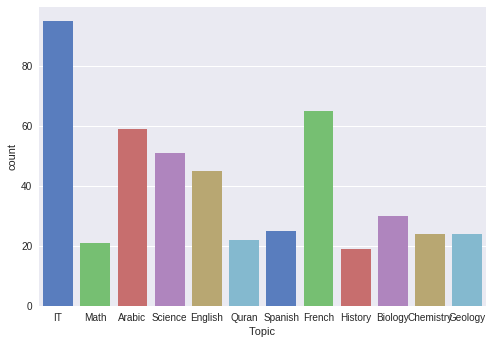

In [0]:
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

تعداد دانش آموزان افتاده در هر درس

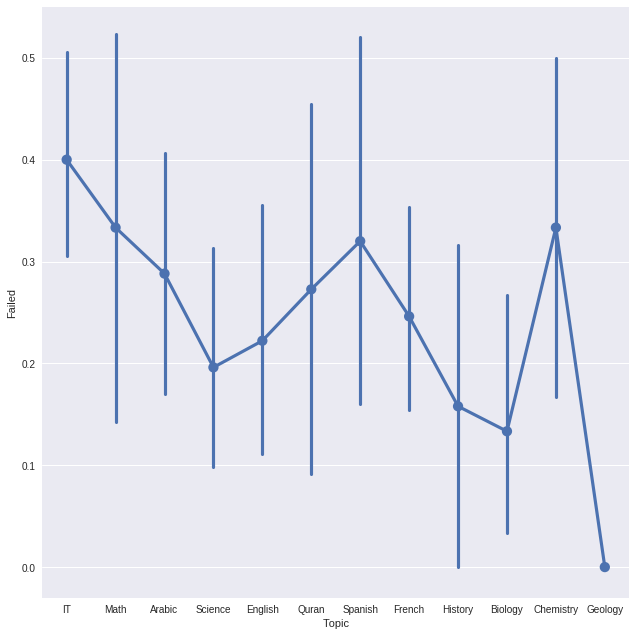

In [0]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)

In [0]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


تعداد دانش آموزان به ازای هر کلاس

In [0]:
df['class'].value_counts()

M    211
H    142
L    127
Name: class, dtype: int64

تعداد دانش آموزان افتاده برای هر جنسیت

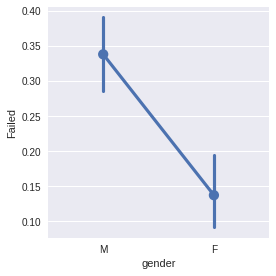

In [0]:
sns.factorplot("gender","Failed",data=df)

نمودار بیانگر فعالیت دانش آموزان در کلاس و نسبت افتادن آنها

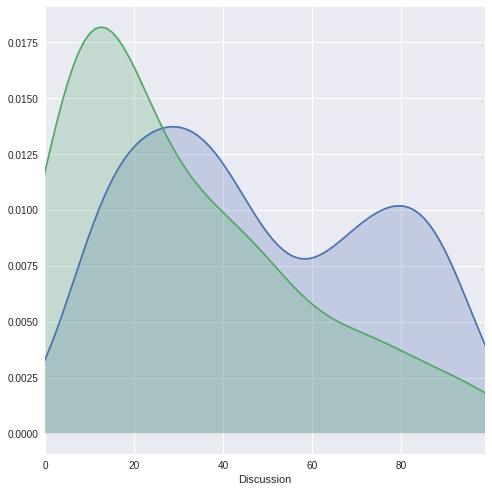

In [0]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'Discussion',shade=True)
Facetgrid.set(xlim=(0,df['Discussion'].max()))
plt.show()

نمودار بیانگر دانش آموزانی که منابع درسی را مطالعه کرده اند و نسبت افتادن آنها

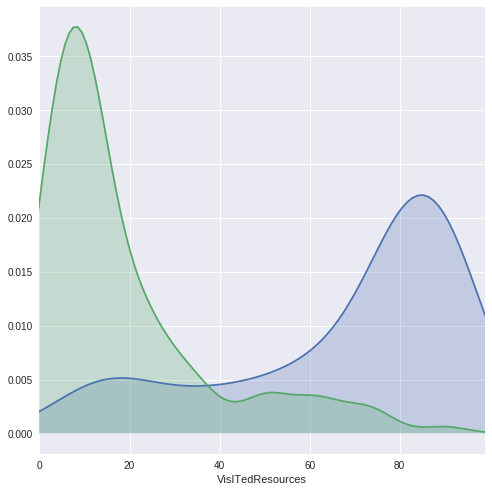

In [0]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'VisITedResources',shade=True)
Facetgrid.set(xlim=(0,df['VisITedResources'].max()))
plt.show()

جدول نمایانگر فعالیت دانش آموزان در کلاس هر درس

In [0]:
df.groupby('Topic').median()


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed
Topic,,,,,
Arabic,32.0,65.0,41.0,38.0,0.0
Biology,78.5,88.5,54.0,47.0,0.0
Chemistry,79.0,84.5,47.0,30.5,0.0
English,55.0,50.0,33.0,36.0,0.0
French,35.0,80.0,23.0,21.0,0.0
Geology,80.0,82.0,68.5,60.5,0.0
History,69.0,84.0,72.0,65.0,0.0
IT,20.0,25.0,10.0,40.0,0.0
Math,28.0,15.0,19.0,40.0,0.0


در این قسمت دانش آموزانی که بیشتر از ۷ جلسه غیبت داشته اند و آنهایی که کمتر از ۷ جلسه غیبت داشته اند در یک ستون جدید با حالت ۰و ۱ ذخیره میشوند.

In [0]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

جدول خلاصه تمام ویژگیها

In [0]:
df[9:13].describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,AbsBoolean
count,4.000000,4.000000,4.000000,4.000000,4.00
mean,36.000000,43.750000,18.500000,43.250000,0.25
std,29.450523,46.636002,13.127579,36.890604,0.50
min,5.000000,1.000000,0.000000,11.000000,0.00
25%,15.500000,4.750000,14.250000,11.750000,0.00
50%,34.500000,43.000000,22.000000,41.000000,0.00
75%,55.000000,82.000000,26.250000,72.500000,0.25
max,70.000000,88.000000,30.000000,80.000000,1.00


**Classification**
تبدیل داده های کتگوری به پیوسته و انجام دسته بندی

In [0]:
df['TotalQ'] = df['class']
df['TotalQ'].loc[df.TotalQ == 'Low-Level'] = 0.0
df['TotalQ'].loc[df.TotalQ == 'Middle-Level'] = 1.0
df['TotalQ'].loc[df.TotalQ == 'High-Level'] = 2.0

continuous_subset = df.ix[:,9:13]
continuous_subset['gender'] = np.where(df['gender']=='M',1,0)
continuous_subset['Parent'] = np.where(df['Relation']=='Father',1,0)

X = np.array(continuous_subset).astype('float64')
y = np.array(df['TotalQ'])
X.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(480, 6)

تقسیم داده ها به داده های تست و ترین و اسکیل کردن آنها

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

اجرای الگوریتم دسته بندی با ژنتیک

In [0]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10, max_eval_time_mins=0.09, population_size=40)
tpot.fit(X_train_std, y_train)

Generation 1 - Current best internal CV score: 0.7030303030303031
Generation 2 - Current best internal CV score: 0.7057932263814617
Generation 3 - Current best internal CV score: 0.7057932263814617
Generation 4 - Current best internal CV score: 0.717825311942959
Generation 5 - Current best internal CV score: 0.7205882352941178
Generation 6 - Current best internal CV score: 0.7205882352941178
Generation 7 - Current best internal CV score: 0.7205882352941178
Generation 8 - Current best internal CV score: 0.7205882352941178
Generation 9 - Current best internal CV score: 0.7205882352941178
Generation 10 - Current best internal CV score: 0.7208556149732621
Generation 11 - Current best internal CV score: 0.7208556149732621
Generation 12 - Current best internal CV score: 0.7208556149732621
Generation 13 - Current best internal CV score: 0.7208556149732621
Generation 14 - Current best internal CV score: 0.7208556149732621
Generation 15 - Current best internal CV score: 0.7208556149732621
Gener

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=1000000,
               max_eval_time_mins=0.09, max_time_mins=10, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=40,
               random_state=None, scoring=None, subsample=1.0,
               template='RandomTree', use_dask=False, verbosity=2,
               warm_start=False)

خروجی پایتونی الگوریتم بالا

In [0]:
tpot.export('tpot_pipeline.py')

**دسته بندی با استفاده از Perceptron**

In [0]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 71


دقت الگوریتم Perceptron

In [0]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.51


In [0]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.46      0.72      0.56        39
          L       0.60      0.53      0.56        34
          M       0.51      0.38      0.44        71

avg / total       0.52      0.51      0.50       144



**دسته بندی با استفاده از الگوریتم Linear Support Vector Classification.**

In [0]:
svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 52


دقت الگوریتم Linear Support Vector Classification.

In [0]:

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.64


In [0]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.54      0.49      0.51        39
          L       0.71      0.85      0.77        34
          M       0.65      0.62      0.63        71

avg / total       0.63      0.64      0.63       144



**Non-linear SVC with rbf دسته بندی با استفاده از الگوریتم**

In [0]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 47


In [0]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


**Random Forest دسته بندی با استفاده از الگوریتم پیشنهادی ژنتیک**

In [0]:
# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1).values
#training_features, testing_features, training_target, testing_target = train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:0.7208556149732621
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=2, min_samples_split=13, n_estimators=100)

exported_pipeline.fit(X_train_std, y_train)
results = exported_pipeline.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != results).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, results))
print(classification_report(y_test, results))

Misclassified samples: 37
Accuracy: 0.74
              precision    recall  f1-score   support

           H       0.69      0.74      0.72        39
           L       0.79      0.79      0.79        34
           M       0.75      0.72      0.73        71

    accuracy                           0.74       144
   macro avg       0.74      0.75      0.75       144
weighted avg       0.74      0.74      0.74       144



دخیل کردن ویژگی تعداد غیبت ها در الگوریتم

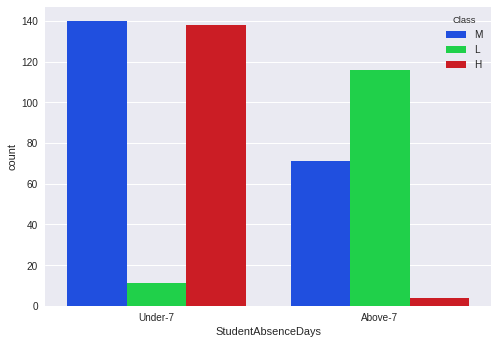

In [0]:
sns.countplot(x='StudentAbsenceDays',data = df, hue='Class',palette='bright')
plt.show()

**الگوریتم دسته بندی ژنتیک  با دخیل کردن ویژگی تعداد غیبتها**

In [0]:
continuous_subset['Absences'] = df['AbsBoolean']
X = np.array(continuous_subset).astype('float64')
y = np.array(df['TotalQ'])
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=2, min_samples_split=13, n_estimators=100)

exported_pipeline.fit(X_train_std, y_train)
results = exported_pipeline.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != results).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, results))
print(classification_report(y_test, results))

Misclassified samples: 28
Accuracy: 0.81
              precision    recall  f1-score   support

           H       0.71      0.74      0.72        39
           L       0.89      0.94      0.91        34
           M       0.82      0.77      0.80        71

    accuracy                           0.81       144
   macro avg       0.81      0.82      0.81       144
weighted avg       0.81      0.81      0.81       144



**SVM with absences feature**

In [0]:
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 38


In [0]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.72      0.46      0.56        39
          L       0.85      0.85      0.85        34
          M       0.69      0.83      0.76        71

avg / total       0.74      0.74      0.73       144



توابع مربوط به الگوریتم درخت تصمیم گیری

In [0]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [0]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [0]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):          # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

In [0]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

In [0]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [0]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [0]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [0]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [0]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [0]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [0]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, args=(tree,), axis=1)
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [0]:
X_new = continuous_subset
y_new = df['TotalQ']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
         X_new, y_new, test_size=0.3, random_state=0)

In [0]:

import random
random.seed(0)
tree = decision_tree_algorithm(continuous_subset, max_depth=10)



الگوریتم بالا همراه با شکست مواجه شد. 


**از میان تمام الگوریتمهای اجرا  شده الگوریتم پیشنهادی توسط ژنتیک بهترین نتیجه را حاصل کرد**.


